<div style="border:solid green 2px; padding: 20px">
<b>Hello, Anton!</b>

My name is Grigoriy and I'm going to review your project.

My main goal is not to show that any mistakes have been made somewhere, but to share my experience that will help you in your further work. Further in the file you can see my comments, try to take them into account when performing the next tasks. **Please, don't delete them.**


You can find my comments in <font color='green'>green</font>, <font color='blue'>blue</font> or <font color='orange'>orange</font> boxes like this:

<div class="alert alert-success">
<b>Reviewer's comment:</b> if everything is done succesfully
</div>

<div class="alert alert-warning">
<b>Reviewer's comment: </b> if I can give some recommendations
</div>

<div class="alert alert-danger">
<b>Reviewer's comment:</b> if the block requires some corrections. Work can't be accepted with the red comments.
</div>

    
Let's work on the project in dialogue: if you change something in the project or respond to my comments, write about it. It will be easier for me to track the changes if you highlight your comments:
    
<div class="alert alert-info"> <b>Student's comment:</b> For example like this.</div>


### <font color='orange'>General feedback</font>
Thank you for sending your project. I am really impressed with your job! I especially liked the code formatting and plots.  I've left some comments which could help you to improve your project and further develop your skills. <br>
During the review I have found two "red" issues, but they concern the absence of two sub-conclusions under the diagrams.  In my opinion, this is too weak a reason for the second iteration, but pay attention to the number of your conclusions in your next sprints. <br>
Your project has passed code-review. Congratulations! Keep up the good work, and good luck on the next sprint!



## Research of the computer games market.

##### Table of contents

0. [Introduction](#introduction)
1. [Opening data files and examining general information.](#opening_data)
2. [Data preprocessing](#data_preprocessing)
3. [Data analysis](#data_analysis)
4. [User profile for each region](#user_profile)
5. [Hypothesis testing](#hypotheses)
6. [Overall conclusion](#overall_conclusion)

### Introduction<a name="introduction"></a>
Task:

I work as an analyst at the online store Ice, which sells video games all over the world. I need to identify patterns that determine whether a game succeeds or not. This will allow will me to spot potential big winners and plan advertising campaigns.

I am going to analyze sales of games in different regions. Identify the most popular gaming platforms and genres. Determine the average life span of a gaming platform. It is also planned to determine whether feedback from specialists and users affects sales.

<div class="alert alert-success">
<b>Reviewer's comment: </b> Great start! It's a very good practice to provide a short intro and an intercative table of contents.
</div>

### Step 1. Open the data file and study the general information<a name="opening_data"></a>

In [1]:
import pandas   as pd
import math
from datetime import datetime
import numpy    as np
from scipy import stats as st
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly.express as px

pd.options.display.float_format = "{:.2f}".format

# games   = pd.read_csv('games.csv')
games   = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')
#analyze the data structure
games.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<div class="alert alert-warning">
<b>Reviewer's comment:</b> This trick let you run code in both cases: <br>
<code>
    LOCAL_PATH = 'your_local_path'
    PLATFORM_PATH = 'platform_path'
    try:
        data = pd.read_csv(LOCAL_PATH)
    except:
        data = pd.read_csv(PLATFORM_PATH) 
</code>
</div>

Let's study the values in columns in order to understand what values are in our table.<br />
Let's print the unique values and their shares in the tables:
- Rating
- Genre
- Year_of_Release
- Platform


In [2]:
games['Rating'].value_counts()/games['Rating'].notna().sum()

E      0.40
T      0.30
M      0.16
E10+   0.14
EC     0.00
K-A    0.00
RP     0.00
AO     0.00
Name: Rating, dtype: float64

In [3]:
games['Genre'].value_counts()/games['Genre'].notna().sum()

Action         0.20
Sports         0.14
Misc           0.10
Role-Playing   0.09
Shooter        0.08
Adventure      0.08
Racing         0.07
Platform       0.05
Simulation     0.05
Fighting       0.05
Strategy       0.04
Puzzle         0.03
Name: Genre, dtype: float64

In [4]:
games['Year_of_Release'].value_counts()/games['Year_of_Release'].notna().sum()

2008.00   0.09
2009.00   0.09
2010.00   0.08
2007.00   0.07
2011.00   0.07
2006.00   0.06
2005.00   0.06
2002.00   0.05
2003.00   0.05
2004.00   0.05
2012.00   0.04
2015.00   0.04
2014.00   0.04
2013.00   0.03
2016.00   0.03
2001.00   0.03
1998.00   0.02
2000.00   0.02
1999.00   0.02
1997.00   0.02
1996.00   0.02
1995.00   0.01
1994.00   0.01
1993.00   0.00
1981.00   0.00
1992.00   0.00
1991.00   0.00
1982.00   0.00
1986.00   0.00
1989.00   0.00
1983.00   0.00
1987.00   0.00
1990.00   0.00
1988.00   0.00
1984.00   0.00
1985.00   0.00
1980.00   0.00
Name: Year_of_Release, dtype: float64

In [5]:
games['Platform'].value_counts()/games['Platform'].notna().sum()

PS2    0.13
DS     0.13
PS3    0.08
Wii    0.08
X360   0.08
PSP    0.07
PS     0.07
PC     0.06
XB     0.05
GBA    0.05
GC     0.03
3DS    0.03
PSV    0.03
PS4    0.02
N64    0.02
XOne   0.01
SNES   0.01
SAT    0.01
WiiU   0.01
2600   0.01
GB     0.01
NES    0.01
DC     0.00
GEN    0.00
NG     0.00
WS     0.00
SCD    0.00
3DO    0.00
TG16   0.00
PCFX   0.00
GG     0.00
Name: Platform, dtype: float64

<div class="alert alert-warning">
<b>Reviewer's comment: </b> Small hint: you can format ratio values as actual percentages: <a>https://stackoverflow.com/a/36175424/11664121</a>. In this case you will alter only a dataframe formatting rules, but not data.
</div>

We have a table with **16715** records. There are missing values in the **[Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating]** columns. In the next section, we will try to recover the missing data and understand the reason why the data is incomplete.

<div class="alert alert-success">
<b>Reviewer's comment: </b> Good job!
</div>

### Step 2. Data preprocessing<a name="data_preprocessing"></a>

#### Converting column names to uppercase

In [6]:
games = games.rename(str.lower, axis='columns')

#### Recovering missing values:

Data is missing in the following columns:<br />
- **Name**  - 2 records<br />
- **Year_of_Release** - 272 records<br />
- **Critic_Score** - 8578 records<br />
- **User_Score** - 6701 records NaN + 2424 records = 'tbd'<br />
- **Rating** - 6766 records<br />

Let's try to recover blank data using a similar game name, but on a different platform. If it is not possible to restore, then we will not delete these records, since the data from other columns will be useful for analysis.<br /><br />
If the game rating is not specified for any platform, then it is not possible to recover the data.


**Name**<br />
There are 2 records that have a NaN value. Let's delete them.

In [7]:
games = games[~games['name'].isna()]

**Rating**<br />
More than 40% of records are not filled.<br />
Firstly, this is due to the fact that the games in our database since 1980, and this rating was introduced in 1994. Also, some manufacturers are lazy to get ratings for their games.<br />
Let's convert data from "String" type to "Int" type. It is easier to use data of int type later in the analysis.<br />
Let's restore the data based on the rating of the same game, but on different platforms.

In [8]:
rating_dict = {'E': 1, 'T':2,'M':3,'E10+':4,'EC':5,'RP':6,'K-A':7,'AO':8}
games['rating_digital'] = games['rating'].replace(rating_dict)  


<div class="alert alert-warning">
<b>Reviewer's comment: </b> Well done! In case of dictionaries map function would be faster: <a>https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html</a>
</div>

In [9]:
def fill_nan_max(selection):    
    
    # I expect to see RuntimeWarnings in this block
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=RuntimeWarning)
        if len(selection) == 0:
            return np.nan        
        else :
            return selection.max()
        
games['rating_digital'] = (
    games['rating_digital'].
    fillna(games.groupby(['name'])['rating_digital'].transform(fill_nan_max))
)
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
 11  rating_digital   10386 non-null  float64
dtypes: float64(7), object(5)
memory usage: 1.7+ MB


**Year of release**<br />
Only 1.5% of records are not filled. I think this is a human factor.<br />
Let's restore the data based on the year the same game was released, but on other platforms. <br />The values that cannot be restored will not be filled with any values (mean or median), since it is not possible to do this with high precision.

In [10]:
games['year_of_release'] = (
    games['year_of_release'].
    fillna(games.groupby(['name'])['year_of_release'].transform(fill_nan_max))
)
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16567 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
 11  rating_digital   10386 non-null  float64
dtypes: float64(7), object(5)
memory usage: 1.7+ MB


**Сritic score**<br />
More than 51% of records are not filled.<br /> Perhaps a lot of games are released and critics do not have time to make an assessment of all the games being released.<br />
Let's recover the data, based on the assessment of the experts of the same game, but on other platforms. <br />
The values that cannot be restored will not be filled with any values (mean or median), since it is not possible to do this with high precision.

In [11]:
#critic_score
def fill_nan(selection):        
    # I expect to see RuntimeWarnings in this block
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=RuntimeWarning)
        if len(selection) == 0:
            return np.nan        
        else :
            return selection.median()
        
games['critic_score'] = games['critic_score'].fillna(
    games.groupby(['name'])['critic_score'].transform(fill_nan)
)
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16567 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     9098 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
 11  rating_digital   10386 non-null  float64
dtypes: float64(7), object(5)
memory usage: 1.7+ MB


**User score**   <br />
More than 55% of records are not filled. <br />
Including 15% of records have the value "tbd". In our case, this is equivalent to the fact that there is no data. <br />
Let's restore the data based on the scores of the players of the same game, but on different platforms. <br />
The values that cannot be restored will not be filled with any values (mean or median), since it is not possible to do this with high precision.

In [12]:
games['user_score'] = games['user_score'].replace('tbd',np.nan)
games['user_score'] = games['user_score'].fillna(
    games.groupby(['name'])['user_score'].transform(fill_nan)
)
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16567 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     9098 non-null   float64
 9   user_score       8689 non-null   object 
 10  rating           9949 non-null   object 
 11  rating_digital   10386 non-null  float64
dtypes: float64(7), object(5)
memory usage: 1.7+ MB


I managed to restore:
- Name - 0 records
- Year_of_Release - 124 records
- Critic_Score - 961 records
- User_Score - 1101 records
- Rating - 439 records

Also many records have 0 values in columns [na_sales, eu_sales, jp_sales, other_sales]. This tells us that these games were not in demand by the players, and sales were very low.

<br />


<div class="alert alert-success">
<b>Reviewer's comment: </b> Excellent job! It's great that you are so conscious about the engineering of Nan values and carefully choose the best way.
</div>

Let's find out if there is duplicate data?

In [13]:
games[games.duplicated(subset=['name','platform'], keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_digital
604,Madden NFL 13,PS3,2012.00,Sports,2.11,0.22,0.00,0.23,83.00,5.5,E,1.00
1190,Need for Speed: Most Wanted,X360,2012.00,Racing,0.62,0.78,0.01,0.15,83.00,8.5,T,2.00
1591,Need for Speed: Most Wanted,X360,2005.00,Racing,1.00,0.13,0.02,0.10,83.00,8.5,T,2.00
1745,Sonic the Hedgehog,PS3,2006.00,Platform,0.41,0.06,0.04,0.66,43.00,4.1,E10+,4.00
4127,Sonic the Hedgehog,PS3,2006.00,Platform,0.00,0.48,0.00,0.00,43.00,4.1,E10+,4.00
5972,Need for Speed: Most Wanted,PC,2005.00,Racing,0.02,0.23,0.00,0.04,82.00,8.5,T,2.00
11715,Need for Speed: Most Wanted,PC,2012.00,Racing,0.00,0.06,0.00,0.02,82.00,8.5,T,2.00
16230,Madden NFL 13,PS3,2012.00,Sports,0.00,0.01,0.00,0.00,83.00,5.5,E,1.00


As we can see 8 records are duplicates.<br /> Let's combine takes.

In [14]:
games = games.groupby(['name','platform']).agg({'year_of_release':'max', 
                                                'genre':'first', 
                                                'na_sales':'max', 
                                                'eu_sales':'max', 
                                                'jp_sales':'max', 
                                                'other_sales':'max', 
                                                'critic_score':'max', 
                                                'user_score':'max', 
                                                'rating':'max', 
                                                'rating_digital':'max'}
                                              ).reset_index()
print('\n {:} duplicates in the table'.format(len(games[games.duplicated(subset=['name','platform'], keep=False)])))


 0 duplicates in the table


Let's calculate the total sales for each game and place these values in a separate column.

In [15]:
games['profit'] = (games['na_sales']
                   + games['eu_sales']
                   +  games['jp_sales']
                   + games['other_sales'])

#### Let's convert the data to the required types.

In [16]:
games['year_of_release'].fillna(0, inplace=True)
games['rating_digital'].fillna(0, inplace=True)
games['critic_score'].fillna(0, inplace=True)
games['user_score'] = pd.to_numeric(games['user_score'],errors='coerce')
try: 
    games['year_of_release']   = games['year_of_release'].astype('int')
    games['critic_score']   = games['critic_score'].astype('int')
    games['rating_digital']   = games['rating_digital'].astype('int')    
except: 
    print('Data conversion failed ((')
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16709 entries, 0 to 16708
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16709 non-null  object 
 1   platform         16709 non-null  object 
 2   year_of_release  16709 non-null  int64  
 3   genre            16709 non-null  object 
 4   na_sales         16709 non-null  float64
 5   eu_sales         16709 non-null  float64
 6   jp_sales         16709 non-null  float64
 7   other_sales      16709 non-null  float64
 8   critic_score     16709 non-null  int64  
 9   user_score       8685 non-null   float64
 10  rating           9945 non-null   object 
 11  rating_digital   16709 non-null  int64  
 12  profit           16709 non-null  float64
dtypes: float64(6), int64(3), object(4)
memory usage: 1.7+ MB


The data type has been changed in the following columns:
1. year_of_release ==> Int (Since the year is always an integer)
2. critic_score ==> int (Since the score is an integer from 0 to 100)
3. user_score ==> float64 (Since the user's rating is in the range from 0 to 10, and may be not integer)

<div class="alert alert-warning">
<b>Reviewer's comment: </b> Small hint: you can specify bit depth of your int or float numbers. For example it could be int8 ot float32. Check these links for the examples:<br>
<a>https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html</a> <br>
<a>https://pbpython.com/pandas_dtypes.html</a>    
</div>

### Step 3. Data analysis.<a name="data_analysis"></a>

##### 3.1 Number of games per year

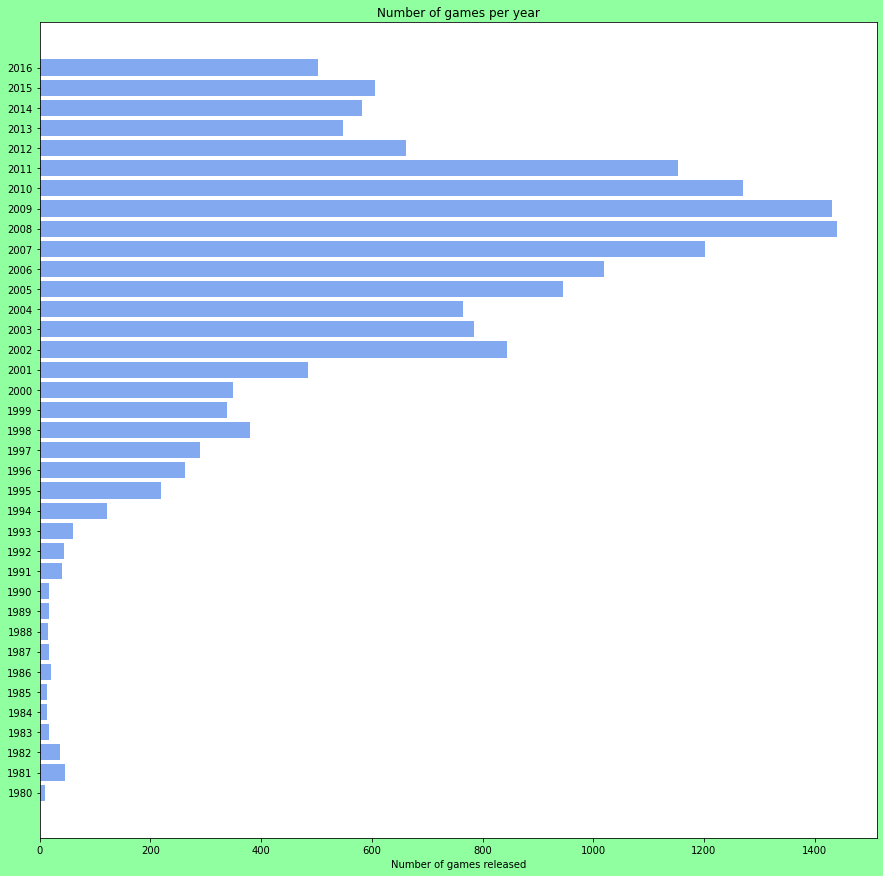

In [17]:
years = games.query('year_of_release != 0').pivot_table(index='year_of_release',values='profit', aggfunc='count')
years_dict = list(years.index.values.tolist()) 

y_pos = np.arange(len(years_dict))
fig, ax = plt.subplots(figsize=(15, 15))
fig.patch.set_facecolor('xkcd:mint green')
plt.barh(y_pos, years['profit'], align='center', alpha=0.8, color='cornflowerblue' )
plt.yticks(y_pos, years_dict)
plt.xlabel('Number of games released')
plt.title('Number of games per year')

plt.show()

<div class="alert alert-warning">
<b>Reviewer's comment: </b> Nice plot! Small hint: you can improve your barplot with values adding. Check this link:<a>https://robertmitchellv.com/blog-bar-chart-annotations-pandas-mpl.html</a>
</div>

We see the number of games released each year. Until 1994, a small number of games were released. It can also be seen that the number of games released has sharply decreased over the past 5 years (since 2012). I think this is due to the fact that since 2012 there has been an active development of mobile phones and many people began to play games on their phones or spend time communicating on social networks.

##### 3.2 Analysis of sales on different platforms.

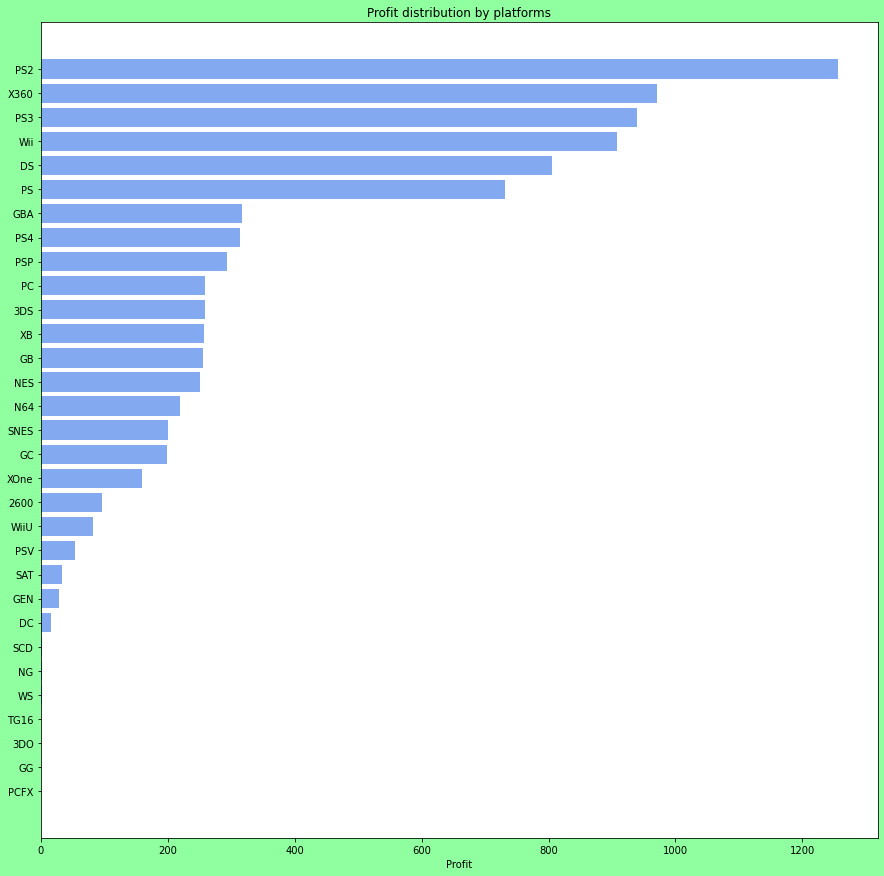

In [18]:
sales_per_platforms = games.pivot_table(index='platform', values='profit', aggfunc='sum')
sales_per_platforms.sort_values(by = 'profit', ascending = True, inplace = True)  
sales_per_platforms_dict = list(sales_per_platforms.index.values.tolist()) 

y_pos = np.arange(len(sales_per_platforms_dict))
fig, ax = plt.subplots(figsize=(15, 15))
fig.patch.set_facecolor('xkcd:mint green')
plt.barh(y_pos, sales_per_platforms['profit'], align='center', alpha=0.8, color='cornflowerblue' )
plt.yticks(y_pos, sales_per_platforms_dict)
plt.xlabel('Profit')
plt.title('Profit distribution by platforms')

plt.show()

<div class="alert alert-danger">
<b>Reviewer's comment: </b> Please, add some conclusions.
</div>

##### 3.2.1   Top-6 platforms by sales volume    

<h4>Largest sales:</h4>

<table style="width:30%">
  <tr>
    <th>Platform</th>
    <th>Profit</th> 
  </tr>
  <tr>
    <td>PS2</td>
    <td>1255</td>
  </tr>
  <tr>
    <td>X360</td>
    <td>971</td>
  </tr>
  <tr>
    <td>PS3</td>
    <td>939</td>
  </tr>
  <tr>
    <td>Wii</td>
    <td>907</td>
  </tr>
  <tr>
    <td>DS</td>
    <td>806</td>
  </tr>
  <tr>
    <td>PS</td>
    <td>731</td>
  </tr>

</table>

</body>
</html>

<div class="alert alert-warning">
<b>Reviewer's comment: </b> Great table, but pay attnetion that it consists from hardcoded constants. You can achive the same result with panads dataframe. How to center it (works with plots as well): <a>https://moonbooks.org/Articles/How-to-center-a-matplotlib-figure-in-a-Jupyter-notebook-/</a>
</div>

In [19]:
top6_platforms_dict = list(sales_per_platforms.tail(6).index.values.tolist()) 
top6_platforms_dict

['PS', 'DS', 'Wii', 'PS3', 'X360', 'PS2']

In [20]:
# function of creating a table of profit distribution by years for a specific platform
def create_df_profit_platform(type_platform):
    item = (
    games.query('platform == @type_platform & year_of_release != 0')
    .pivot_table(index = 'year_of_release',
                 values ='profit',
                 aggfunc ='sum')
               )
    return item

In [21]:
# function for defining outlier boundaries
def outliers_lower_upper(name_df,column):
    q1 = name_df[column].quantile(0.25)
    q3 = name_df[column].quantile(0.75)
    iqr = q3 - q1
    if q1 - iqr*1.5 < 0:
        return (0, q3 + iqr*1.5)
    else:
        return (q1 - iqr*1.5, q3 + iqr*1.5)        


In [22]:
# function to create a table and remove outliers
def create_df_for_plot(item):
    # create data for the selected platform
    df_platform  = create_df_profit_platform(item)
    # determining emissions
    df_platform  = df_platform.reset_index(drop=False)
    outliers     = outliers_lower_upper(df_platform,'year_of_release')
    # removing emissions
    df_platform = df_platform[
        (df_platform['year_of_release'] > outliers[0])
        &
        (df_platform['year_of_release'] < outliers[1])   
    ]
    df_platform = df_platform.pivot_table(index = 'year_of_release')
    return df_platform

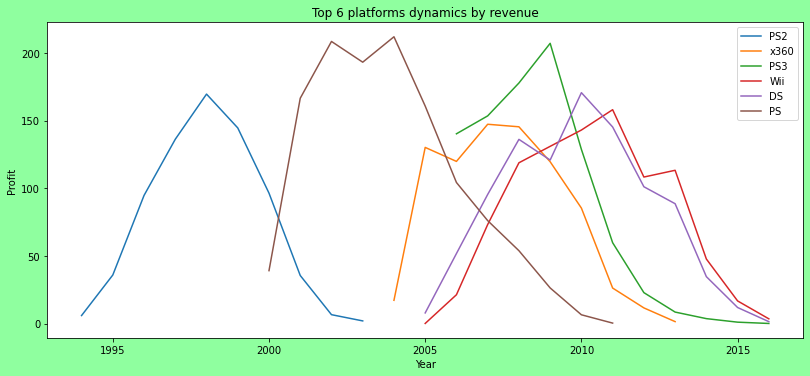

In [23]:
# Let's build graphs
fig, ax = plt.subplots(figsize=(15, 6))
fig.subplots_adjust(bottom=0.15, left=0.2)
for item in top6_platforms_dict:
    ax.plot(create_df_for_plot(item))

ax.set_xlabel('Year')
ax.set_ylabel('Profit')
plt.legend(["PS2", "x360",'PS3','Wii','DS','PS'])
ax.set_title('Top 6 platforms dynamics by revenue')
fig.patch.set_facecolor('xkcd:mint green')

plt.show()

<div class="alert alert-danger">
<b>Reviewer's comment:</b> Please, add some conclusions here as well.
</div>

<div class="alert alert-warning">
<b>Reviewer's comment: </b> Good! You can skip the loop and plot all lines with one line of code with pandas line plot:<br> <a>https://stackoverflow.com/a/51006642/11664121</a> <br>
Also, area plot could be useful here:<a>https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.area.html</a>
</div>

##### 3.2.2. Previously popular platforms
<br />
Let's define the platforms for which the games were released in the last 2 years.


In [24]:
sales_in_last_years = ( 
    games.query('year_of_release >= 2015')
    .pivot_table(index = 'platform',
                 values = 'profit',
                 aggfunc='sum')
)
sales_in_last_years

,profit
platform,
3DS,42.92
PC,13.77
PS3,20.42
PS4,188.15
PSP,0.12
PSV,10.50
Wii,1.32
WiiU,20.95
X360,13.48


Let's define platforms for which no games have been released in the last 2 years.

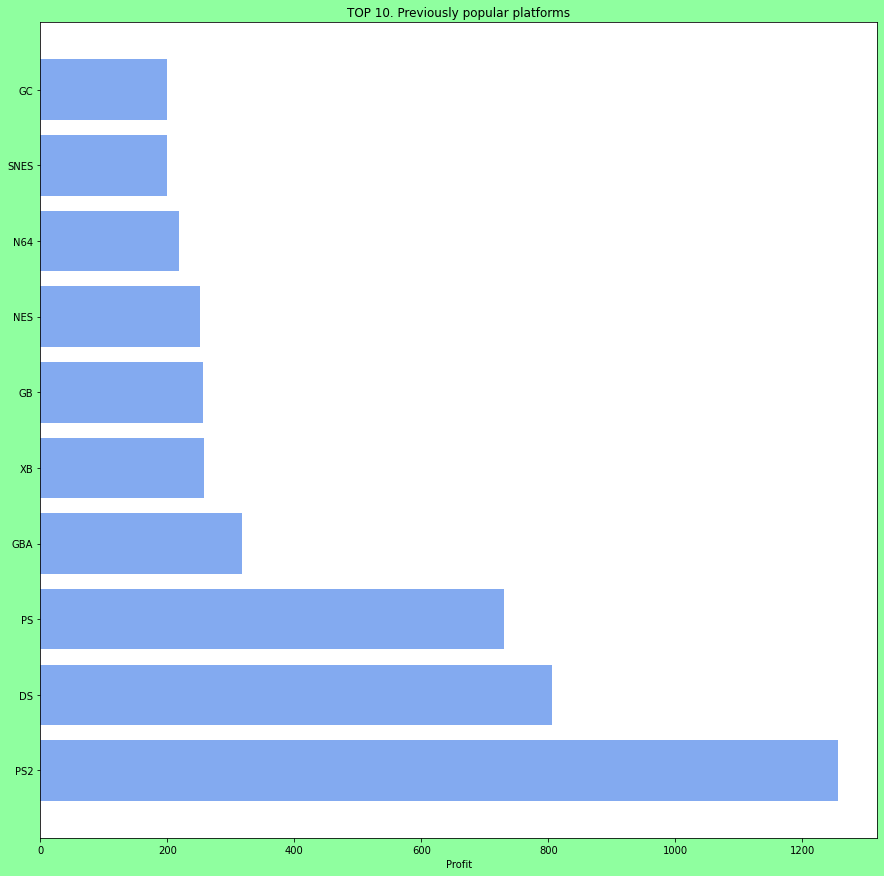

In [25]:
top10_old_popular_platforms = sales_per_platforms.query('index not in @sales_in_last_years.index')
top10_old_popular_platforms = top10_old_popular_platforms.sort_values(by = 'profit', ascending = False)
top10_old_popular_platforms = top10_old_popular_platforms.head(10)
top10_old_popular_platforms_dict = list(top10_old_popular_platforms.index.values.tolist()) 

y_pos = np.arange(len(top10_old_popular_platforms_dict))
fig, ax = plt.subplots(figsize=(15, 15))
fig.patch.set_facecolor('xkcd:mint green')
plt.barh(y_pos, top10_old_popular_platforms['profit'], align='center', alpha=0.8, color='cornflowerblue' )
plt.yticks(y_pos, top10_old_popular_platforms_dict)
plt.xlabel('Profit')
plt.title('TOP 10. Previously popular platforms')

plt.show()

<div class="alert alert-danger">
<b>Reviewer's comment:</b> Conclusions? :)
</div>

##### 3.2.3. Determine the average lifespan of a gaming platform.
<br />
Let's add a column with the platform activity period

In [26]:
games['years_active'] = (
    games.query('year_of_release != 0')
    .groupby(['platform'])['year_of_release']
    .transform(lambda x: x.max() - x.min())
)
# let's filter out inactive platforms, knowing the period of activity and profit
term_life_platforms = games.query('platform not in @sales_in_last_years.index').pivot_table(index = 'platform', 
                      values = ['profit','years_active'], aggfunc = ['sum','median'])
term_life_platforms.columns = ['profit','sum_years','median_profit','years_active']
term_life_platforms.drop(['sum_years','median_profit'], axis='columns', inplace=True)

# let's calculate the average lifespan of the platform for the 10 most popular
active_years_median = (
    term_life_platforms.
    sort_values(by = 'profit', ascending = False)
    .head(10)['years_active']
    .median()
)
print('The 10 most popular platforms have a median lifespan of {:0.0f} years'.format(active_years_median))

The 10 most popular platforms have a median lifespan of 9 years


After analyzing the 10 most profitable platforms, I found that the average duration of their use is 9 years. Then game makers stop making games for those platforms and consider them obsolete.


##### 3.3 Defining the boundaries of the analyzed data to create a forecast for 2017.
<br />Since the average lifespan of a platform is 9 years, for the forecast for 2017, I will use data from 2009

##### 3.4 Let's find out which modern platforms are leading in sales?

In [27]:
# sales_in_last_years
modern_games = games.query('(platform in @sales_in_last_years.index) & (year_of_release >= 2009)')
profit_modern_games = modern_games.pivot_table(index = 'platform', values = 'profit', aggfunc = 'sum')
profit_modern_games.sort_values(by = 'profit', ascending = False)

,profit
platform,
PS3,721.57
X360,674.51
Wii,432.03
PS4,314.14
3DS,258.53
XOne,159.32
PC,142.08
PSP,103.13
WiiU,82.19


We have identified the platforms for which games are released in 2016.<br />
Let's define platforms for which the release of games is growing and for which it is decreasing.

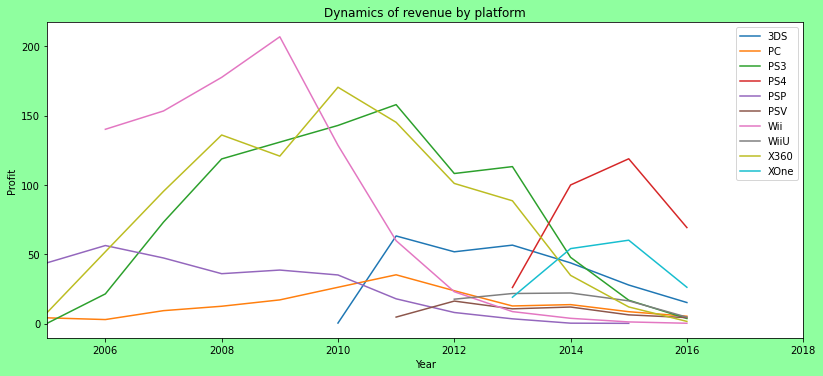

In [28]:
profit_modern_games_dict = list(profit_modern_games.index.values.tolist()) 
profit_modern_games_dict

fig, ax = plt.subplots(figsize=(15, 6))
fig.subplots_adjust(bottom=0.15, left=0.2)

for item in profit_modern_games_dict:
    ax.plot(create_df_for_plot(item))
    
ax.set_xlabel('Year')
ax.set_ylabel('Profit')
ax.set_title('Dynamics of revenue by platform')
ax.set_xlim(2005, 2018)
plt.legend(profit_modern_games_dict)
fig.patch.set_facecolor('xkcd:mint green')

plt.show()

The graph shows that the market leaders are **[PS4, XOne, 3DS]**<br />
As we can see, the charts of all platforms have a downtrend. Although in 2015, two platforms **[PS4, XOne]** had growth. I think this is due to the fact that the data for 2016 is not fully entered. <br />
Thus, potentially profitable platforms are **[PS4, XOne]**

<div class="alert alert-success">
<b>Reviewer's comment: </b> Good point!
</div>

##### 3.5 We will build a box plot for the global sales of all games, broken down by platform.

Text(0.5, 1.0, 'Selling games by platform')

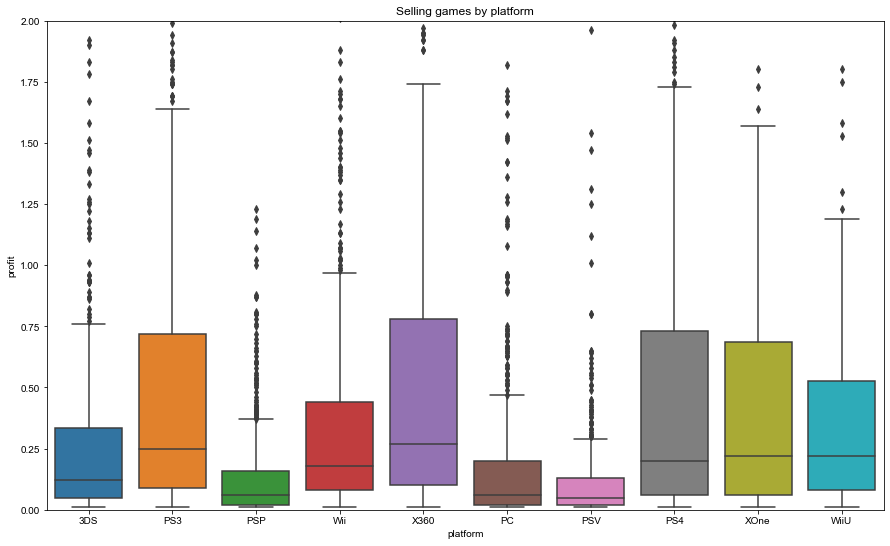

In [29]:
plt.figure(figsize = (15,9))
plt.ylim([0,2])
sns.set_style("white")
sns.boxplot(
    x = "platform"
    , y = "profit"
    , data = modern_games
).set_title('Selling games by platform')


Build box_plot shows that Top4 **[X360, PS3, PS4, XOne]** has no significant sales differences.
The maximum is **750,000**, the average revenue is about **250,000**. However, the outsiders **[PC, PSP, PSV]** have much worse sales. The maximum is up to **180,000**, and the average is **50,000**.

##### 3.6 We will study how user and critic reviews affect sales.

For the analysis, I chose the **PS3** platform.

In [30]:
correlation_dict = modern_games.query('platform == "PS3" & critic_score != 0').corr()['profit']
correlation_dict = correlation_dict[['critic_score','user_score']]
print('Correlation coefficients: (influence on profit)')
correlation_dict

Correlation coefficients: (influence on profit)


critic_score   0.39
user_score     0.09
Name: profit, dtype: float64

Let's build scatter diagrams of the impact of reviews on sales.

<AxesSubplot:xlabel='user_score', ylabel='profit'>

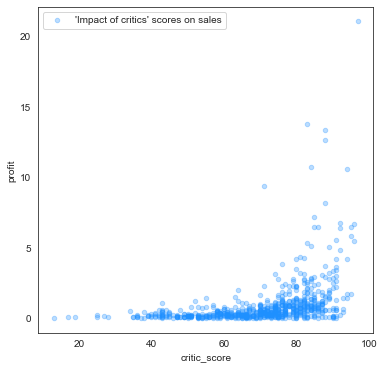

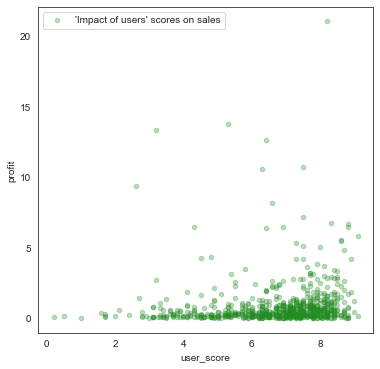

In [31]:
# let's build scatter plot
( modern_games.query('platform == "PS3" & critic_score != 0').
 plot(x = 'critic_score', 
      y = 'profit', 
      kind='scatter',
      figsize=(6, 6),
      color='dodgerblue', 
      label="'Impact of critics' scores on sales", 
      alpha = 0.3)
)

( modern_games.query('platform == "PS3"').
 plot(x = 'user_score', 
      y = 'profit', 
      kind='scatter',
      figsize=(6, 6),
      color='forestgreen', 
      label="'Impact of users' scores on sales", 
      alpha = 0.3)
)

After analyzing the impact of professional and user reviews on sales, I came to the following conclusion:
    1. User reviews do not affect sales
    2. Critic reviews have a very weak impact on sales.

<div class="alert alert-warning">
<b>Reviewer's comment: </b> Please, pay attention to the correlation calculation method you have chosen. By default, pandas uses the Pearson's correlation. However, it is very unstable to outliers, which are quite a lot judging by the scatter plot. In your case, Spearman's correlation is more suitable, it uses ratings instead of actual values. Check this link:<a>https://cmdlinetips.com/2019/08/how-to-compute-pearson-and-spearman-correlation-in-python/</a>
</div>

##### 3.7 Correlation across all modern platforms

In [32]:
def calculate_correlation(type_platform):
    corr_temp = modern_games.query('platform == @type_platform & critic_score != 0').corr()['profit']
    corr_temp = corr_temp[['critic_score','user_score']]
    correlation_dict.append([i,corr_temp[0],corr_temp[1]])

all_platforms_dict = list(profit_modern_games.index.values.tolist()) 

#create and fill in the correlation table for all platforms
correlation_dict = []
for i in all_platforms_dict:
    calculate_correlation(i)
    
correlation_dict = pd.DataFrame(correlation_dict, columns=['platform',
                                                           'corr_critic_score',
                                                           'corr_user_score']) 
correlation_dict

,platform,corr_critic_score,corr_user_score
0,3DS,0.32,0.23
1,PC,0.29,-0.01
2,PS3,0.39,0.09
3,PS4,0.39,-0.03
4,PSP,0.32,0.17
5,PSV,0.17,0.05
6,Wii,0.20,0.13
7,WiiU,0.32,0.36
8,X360,0.34,0.07
9,XOne,0.38,-0.09


On other platforms the situation is similar, but there are exceptions. For example, on the **WiiU** platform, user reviews affect sales. There are also platforms **[PSV, Wii]** where expert reviews have practically no effect on sales.

##### 3.7 Analysis of games by genre



In [33]:
genre_count = modern_games.pivot_table(index = 'genre', values = 'name', aggfunc = 'count')
genre_count.columns = ['count']
genre_count.sort_values(by = 'count', ascending = False)


,count
genre,
Action,1598
Sports,676
Misc,599
Role-Playing,598
Adventure,561
Shooter,490
Racing,290
Fighting,232
Simulation,212


Let's build a graph of the distribution of games by genre.

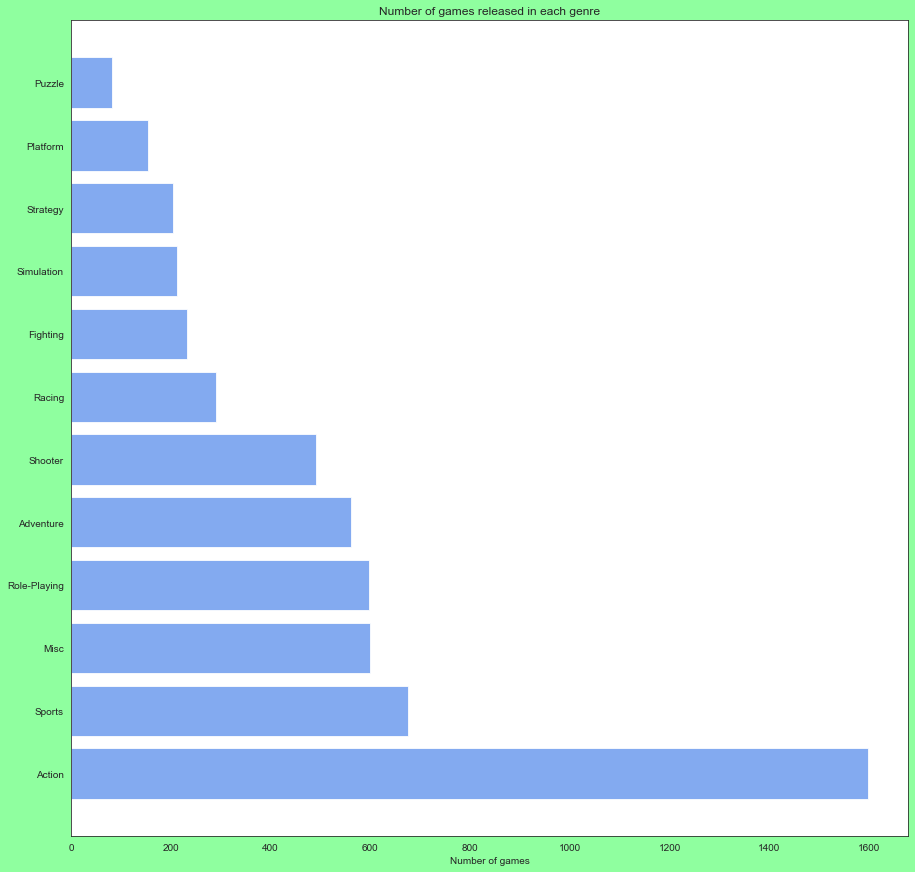

In [34]:

genre_count = genre_count.sort_values(by = 'count', ascending = False)
genre_count_dict = list(genre_count.index.values.tolist()) 

y_pos = np.arange(len(genre_count_dict))
fig, ax = plt.subplots(figsize=(15, 15))
fig.patch.set_facecolor('xkcd:mint green')
plt.barh(y_pos, genre_count['count'], align='center', alpha=0.8, color='cornflowerblue' )
plt.yticks(y_pos, genre_count_dict)
plt.xlabel('Number of games')
plt.title('Number of games released in each genre')

plt.show()

As we can see, the majority of games are in the **Action** and **Sports** genres. Least of all **Platform** and **Puzzle** games are released.

<div class="alert alert-success">
<b>Reviewer's comment: </b> Yes, you are right. Very good that you feel what kind of plot your should use for different cases.
</div>

Let's calculate the profit for each genre.

In [35]:
#genre / profit
genre_profit = modern_games.pivot_table(index = 'genre', values = 'profit', aggfunc = 'sum')
genre_profit.sort_values(by = 'profit', ascending = False)

,profit
genre,
Action,756.42
Shooter,548.69
Sports,447.17
Role-Playing,307.26
Misc,273.51
Platform,150.67
Racing,149.50
Fighting,109.13
Simulation,80.40


In [36]:
genre_count['profit'] = genre_profit['profit']
genre_count.sort_values(by = 'count', ascending = False, inplace = True)
genre_count

,count,profit
genre,,
Action,1598,756.42
Sports,676,447.17
Misc,599,273.51
Role-Playing,598,307.26
Adventure,561,61.77
Shooter,490,548.69
Racing,290,149.50
Fighting,232,109.13
Simulation,212,80.40


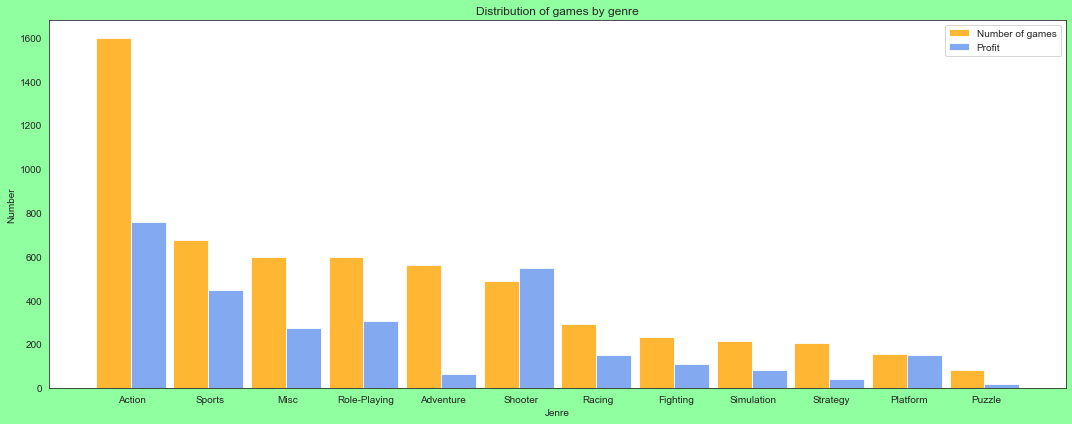

In [37]:
# one chart with two columns per genre / quantity + profit
all_platforms_dict = list(genre_count.index.values.tolist()) 
n_groups = len(all_platforms_dict)

# create plot
fig, ax = plt.subplots(figsize=(15, 6))
fig.patch.set_facecolor('xkcd:mint green')
index = np.arange(n_groups)
bar_width = 0.45
opacity = 0.8
rects1 = plt.bar(index, genre_count['count'], bar_width,
                 alpha=opacity,
                 color='orange',
                 label='Number of games')

rects2 = plt.bar(index + bar_width, genre_count['profit'], bar_width,
                 alpha=opacity,
                 color='cornflowerblue',
                 label='Profit')

plt.xlabel('Jenre')
plt.ylabel('Number')
plt.title('Distribution of games by genre')

plt.xticks(index + bar_width-0.2, all_platforms_dict)
plt.legend()

plt.tight_layout()
plt.show()

The TOP 3 genres with the highest profit include: **[Action, Shooter, Sports]**<br />
The lowest profits are from the **[Puzzle, Strategy, Adventure]** genres. <br />The **Adventure** genre looks strange. A large number of games are created, and the profit from them is the smallest.

<div class="alert alert-success">
<b>Reviewer's comment: </b> 👍
</div>

### Step 4. User profiles from different regions<a name="user_profile"></a>
<br />
Let's create a user profile for each region. <br />
Let's define TOP 5 sales platforms. <br />
Let's define TOP 5 genres according to the best sales. <br />
Let's examin the impact of ESRB ratings on sales in selected regions?

#### 4.1 North America

In [38]:
#platforms
modern_games_na = modern_games.query('na_sales != 0')
modern_games_na_platforms = ( modern_games_na.
                             pivot_table(index = 'platform', 
                                         values = 'profit', 
                                         aggfunc = 'sum' )
                             .sort_values(by = 'profit', 
                                          ascending = False)                                
                            )
total_profit_na = modern_games_na_platforms['profit'].sum()
modern_games_na_platforms['share_profit'] = modern_games_na_platforms['profit'] / total_profit_na * 100
modern_games_na_platforms.head(5)


,profit,share_profit
platform,,
PS3,694.25,25.13
X360,670.99,24.29
Wii,415.72,15.05
PS4,307.48,11.13
3DS,218.93,7.92


In [39]:
#genre
modern_games_na_genre = ( modern_games_na.
                         pivot_table(index = 'genre', 
                                     values = 'profit', 
                                     aggfunc = 'sum' )
                         .sort_values(by = 'profit', 
                                      ascending = False)                                
                        )

modern_games_na_genre['share_profit'] = modern_games_na_genre['profit'] / total_profit_na * 100
modern_games_na_genre.head(5)

,profit,share_profit
genre,,
Action,712.63,25.80
Shooter,545.03,19.73
Sports,428.12,15.50
Role-Playing,263.77,9.55
Misc,250.71,9.08


#### 4.2 Europe

In [40]:
#platforms
modern_games_eu = modern_games.query('eu_sales != 0')
modern_games_eu_platforms = ( modern_games_eu.
                             pivot_table(index = 'platform', 
                                         values = 'profit', 
                                         aggfunc = 'sum' )
                             .sort_values(by = 'profit', 
                                          ascending = False)                                
                            )
total_profit_eu = modern_games_eu_platforms['profit'].sum()
modern_games_eu_platforms['share_profit'] = modern_games_eu_platforms['profit'] / total_profit_eu * 100
modern_games_eu_platforms.head(5)

,profit,share_profit
platform,,
PS3,682.73,25.20
X360,653.89,24.13
Wii,379.15,13.99
PS4,306.41,11.31
3DS,214.64,7.92


In [41]:
#genre
modern_games_eu_genre = ( modern_games_eu.
                         pivot_table(index = 'genre', 
                                     values = 'profit', 
                                     aggfunc = 'sum' )
                         .sort_values(by = 'profit', 
                                      ascending = False)                                
                        )

modern_games_eu_genre['share_profit'] = modern_games_eu_genre['profit'] / total_profit_eu * 100
modern_games_eu_genre.head(5)

,profit,share_profit
genre,,
Action,707.07,26.10
Shooter,543.46,20.06
Sports,401.11,14.80
Role-Playing,257.74,9.51
Misc,238.74,8.81


##### 4.3 Japan

In [42]:
#platforms
modern_games_jp = modern_games.query('jp_sales != 0')
modern_games_jp_platforms = ( modern_games_jp.
                             pivot_table(index = 'platform', 
                                         values = 'profit', 
                                         aggfunc = 'sum' )
                             .sort_values(by = 'profit', 
                                          ascending = False)                                
                            )
total_profit_jp = modern_games_jp_platforms['profit'].sum()
modern_games_jp_platforms['share_profit'] = modern_games_jp_platforms['profit'] / total_profit_jp * 100
modern_games_jp_platforms.head(5)

,profit,share_profit
platform,,
PS3,547.52,28.94
X360,416.54,22.02
PS4,264.86,14.00
3DS,234.61,12.40
Wii,192.54,10.18


In [43]:
#genre
modern_games_jp_genre = ( modern_games_jp.
                         pivot_table(index = 'genre', 
                                     values = 'profit', 
                                     aggfunc = 'sum' )
                         .sort_values(by = 'profit', 
                                      ascending = False)                                
                        )
modern_games_jp_genre['share_profit'] = modern_games_jp_genre['profit'] / total_profit_jp * 100
modern_games_jp_genre.head(5)

,profit,share_profit
genre,,
Action,489.70,25.88
Shooter,428.05,22.62
Role-Playing,255.69,13.51
Sports,222.99,11.79
Platform,125.36,6.63


Conclusion:<br /> The most popular platforms are the same in all regions. In North America and Europe, even the shares are almost the same. The only difference in Japan is the low popularity of the Wii platform, it is in the last, fifth place, while in Europe it is in third.<br />
As for genres, in Europe and North America, the same genres are popular, and with about the same proportion. In Japan, the Platform genre is in the top 5.

Let's build a graph of the distribution of games by ESRB rating in different regions.

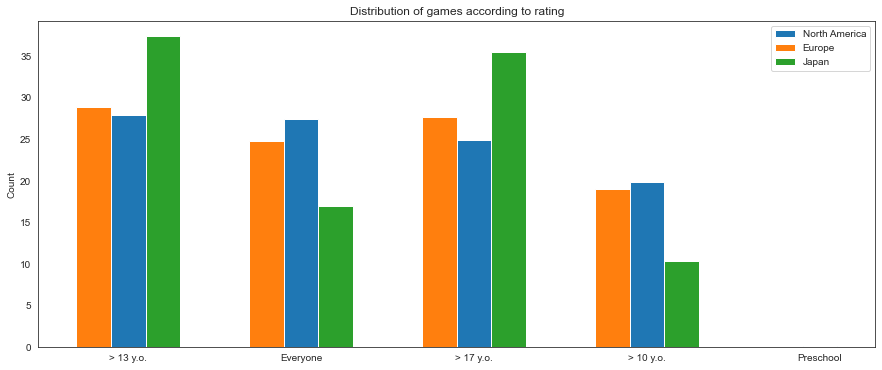

In [44]:
rating_esrb_na = modern_games_na.pivot_table(index = 'rating', 
                                             values = 'name', 
                                             aggfunc = 'count').sort_values(by = 'name',
                                                                            ascending = False)
rating_esrb_eu = modern_games_eu.pivot_table(index = 'rating', 
                                             values = 'name', 
                                             aggfunc = 'count')

rating_esrb_jp = modern_games_jp.pivot_table(index = 'rating', 
                                             values = 'name', 
                                             aggfunc = 'count')
rating_esrb = rating_esrb_na
rating_esrb['eu'] = rating_esrb_eu['name']
rating_esrb['jp'] = rating_esrb_jp['name']
rating_esrb.columns = ['na','eu','jp']

count_esrb_na = rating_esrb['na'].sum()
count_esrb_eu = rating_esrb['eu'].sum()
count_esrb_jp = rating_esrb['jp'].sum()

rating_esrb['na_per'] = rating_esrb['na']/count_esrb_na * 100
rating_esrb['eu_per'] = rating_esrb['eu']/count_esrb_eu * 100
rating_esrb['jp_per'] = rating_esrb['jp']/count_esrb_jp * 100

raiting_dict = ['> 13 y.o.','Everyone','> 17 y.o.','> 10 y.o.','Preschool']
n = len(raiting_dict)

ind = np.arange(n) 
width = 0.2    
fig, ax = plt.subplots(figsize=(15, 6))
plt.bar(ind, rating_esrb['na_per'], width, label='North America')
plt.bar(ind - width, rating_esrb['eu_per'], width, label='Europe')
plt.bar(ind + width, rating_esrb['jp_per'], width, label='Japan')

plt.ylabel('Count')
plt.title('Distribution of games according to rating')

plt.xticks(ind, raiting_dict)
plt.legend(loc='upper right')
plt.show()


We see that in different regions, age groups differ. As you can see from the histogram, in Japan games with a rating **"> 13 y.o."** take more than 38%, while in Europe and the USA only 28%, and games with a rating **"> 10 y.o"** are also not very popular in Japan. Other types of ratings have approximately the same share in different regions.


<div class="alert alert-success">
<b>Reviewer's comment: </b> Excellent plot!
</div>

### Step 5.<a name="hypotheses"></a>

Consider 2 hypotheses:

Average user ratings of the Xbox One and PC platforms are the same.<br />
Average user ratings for the Action and Sports genres are different.

##### 5.1 Average user ratings of the Xbox One and PC platforms are the same.
**Hypothese Null:** Average user ratings of the Xbox One and PC platforms are the same. <br />**Hypothese alternative:** Average user ratings of the Xbox One and PC platforms are different.

In this case: Hypothesis on the Equality of Two Population Means.

Each sample has more than 50 records, which means the samples are large enough to test hypotheses.

Let's find out the variance for each samples.<br />
Set **alpha** = 0.05, since we are evaluating a hypothesis for a business problem.

In [45]:
user_score_df = modern_games[modern_games.user_score.notnull()].reset_index(drop=True)
platform_xone_user_score = user_score_df[user_score_df.platform == "XOne"].user_score.reset_index(drop=True)
platform_pc_user_score = user_score_df[user_score_df.platform == "PC"].user_score.reset_index(drop=True)

print('The variance "Xbox One" is {:.02f}'.format(np.var(platform_xone_user_score)))
print('The variance "PC" is {:.02f}'.format(np.var(platform_pc_user_score)))

The variance "Xbox One" is 1.88
The variance "PC" is 2.40


<div class="alert alert-success">
<b>Reviewer's comment: </b> Good, that you paided attention to the variance check!
</div>

To test the hypothesis, we will use T-test.
Let's build graphs.

Text(0.5, 1.0, 'QQ plots. Xbox One Platform User Ratings')

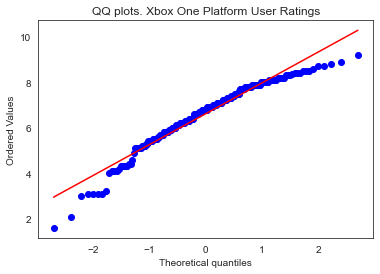

In [46]:
st.probplot(platform_xone_user_score, dist="norm", plot= plt)
plt.title("QQ plots. Xbox One Platform User Ratings")

The plotted graph, we inform us that the data has a distribution of the **"Skew Left"** type

Text(0.5, 1.0, 'QQ plots. PC Platform User Ratings')

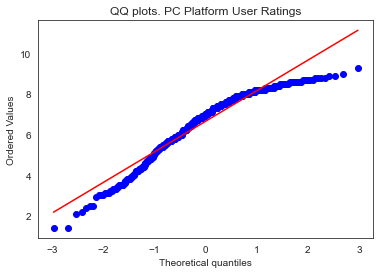

In [47]:
st.probplot(platform_pc_user_score, dist="norm", plot= plt)
plt.title("QQ plots. PC Platform User Ratings")


<div class="alert alert-warning">
<b>Reviewer's comment: </b> Good! You can check normality more formal with the Shapiro-Wilk test:<br> <a>https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html</a>
</div>

In [48]:
alpha = 0.05 #business case 
# Let's check our hypothesis
result = st.stats.ttest_ind(
    platform_xone_user_score,
    platform_pc_user_score,
    equal_var = False)
print(result.pvalue)

if (result.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis") 

0.7481656021153811
We can't reject the null hypothesis


Conclusion:

The empirically obtained data does not disprove the null hypothesis, and we have no reason to argue that the average user ratings of the **Xbox One** and **PC** platforms are different.

##### 5.2 Average user ratings for the Action and Sports genres are different.

**Hypothese Null:** Average user ratings for the Action and Sports genres are the same.<br />
**Hypothese alternative:** Average user ratings for the Action and Sports genres are different.

In this case: Hypothesis on the Equality of Two Population Means.

Each sample has more than 50 records, which means the samples are large enough to test hypotheses.

Let's find out the variance for each samples.
Set alpha = 0.05, since we are evaluating a hypothesis for a business problem.

<div class="alert alert-success">
<b>Reviewer's comment: </b> Great that you paided so much attention to the hypotheses formulation!
</div>

In [49]:
genre_action_user_score = user_score_df[user_score_df.genre == "Action"].user_score.reset_index(drop=True)
genre_sports_user_score = user_score_df[user_score_df.genre == "Sports"].user_score.reset_index(drop=True)

print('The variance "Action" is {:.02f}'.format(np.var(genre_action_user_score)))
print('The variance "Sports" is {:.02f}'.format(np.var(genre_sports_user_score)))

The variance "Action" is 1.80
The variance "Sports" is 2.84


To test the hypothesis, we will use T-test. Let's build graphs.

Text(0.5, 1.0, 'QQ plots. User ratings of the genre Action')

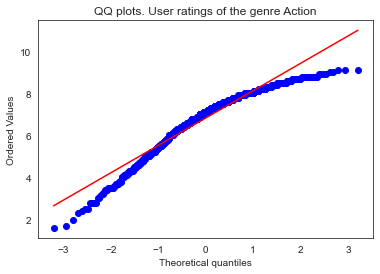

In [50]:
st.probplot(genre_action_user_score, dist="norm", plot= plt)
plt.title("QQ plots. User ratings of the genre Action")

Text(0.5, 1.0, 'QQ plots. User ratings of the genre Sports')

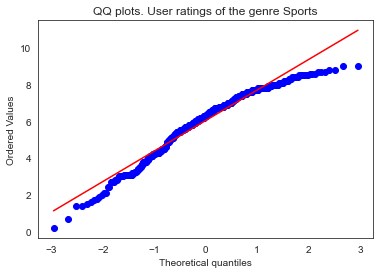

In [51]:
st.probplot(genre_sports_user_score, dist="norm", plot= plt)
plt.title("QQ plots. User ratings of the genre Sports")

<div class="alert alert-warning">
<b>Reviewer's comment: </b> Small tip: You can align these plot side by side with plt.subplots: <a>https://pythonspot.com/matplotlib-subplot/</a>
</div>

In [52]:
alpha = 0.05 #business case 
# Let's check our hypothesis
result = st.stats.ttest_ind(
    genre_action_user_score,
    genre_sports_user_score,
    equal_var = False)
print(result.pvalue)

if (result.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis") 

1.73766222215759e-17
We reject the null hypothesis


Conclusion:<br />
The hypothesis that the average user ratings for the **Action** and **Sports** genres are the same has not been confirmed.

An interesting fact was also noticed that if we test hypotheses not on actual data since 2009, but for the full period of data collection, then the answer will be the opposite (We will discard the null hypothesis in the first case, and we will not have justification to discard the null hypothesis in second case). But since we are making a forecast for 2017, it is correct to use actual data to test the hypothesis.


<div class="alert alert-success">
<b>Reviewer's comment: </b> That's it, all tests are right!
</div>

### Step 6. Overall conclusion <a name="overall_conclusion"></a>

After analyzing the received data, I filled in the missing values, removed duplicates, and identified outliers and anomalies.<br />

After analyzing the data, I came to the conclusion that user ratings do not affect sales, while critical ratings do, but not much. The most popular genres are Action, Shooter and Sports. The most promising platforms are PS4 and XOne. They have recently entered the market and have the highest sales volumes and growing sales dynamics. Presumably, these platforms will be popular until 2021.<br />

Also, 2 hypotheses were tested. The hypothesis that the average estimates of users of the Xbox One and PC platforms are the same has not been refuted. The hypothesis that the average user ratings of the Action and Sports genres differ has not been confirmed. 

<div class="alert alert-success">
<b>Reviewer's comment: </b> Good point! Thank you for the reserach!
</div>